# **🛠️ Preparación de los Datos**

## **Extracción del Archivo Tratado**

Carga el archivo CSV que contiene los datos tratados anteriormente.

In [2]:
import pandas as pd

In [3]:
datos = pd.read_csv('../data/Datos_TelecomX.csv')

In [4]:
datos.head()

,Evasión,Género,Adulto Mayor,Tiene Pareja,Dependiente,Permanencia,Servicio Telefónico,Líneas Múltiples,Servicio Internet,Seguridad en Línea,...,Protección Dispositivo,Soporte Técnico,Streaming de TV,Streaming de Películas,Tipo Contrato,Facturación Electronica,Método de Pago,Cargo Mensual,Cargo Total,Cargo Diario
0,False,Femenino,False,True,True,9,True,False,DSL,False,...,False,True,True,False,Un año,True,Cheque por correo,65.6,593.30,2.186667
1,False,Masculino,False,False,False,9,True,True,DSL,False,...,False,False,False,True,Mes-a-Mes,False,Cheque por correo,59.9,542.40,1.996667
2,True,Masculino,False,False,False,4,True,False,Fibra óptica,False,...,True,False,False,False,Mes-a-Mes,True,Cheque electrónico,73.9,280.85,2.463333
3,True,Masculino,True,True,False,13,True,False,Fibra óptica,False,...,True,False,True,True,Mes-a-Mes,True,Cheque electrónico,98.0,1237.85,3.266667
4,True,Femenino,True,True,False,3,True,False,Fibra óptica,False,...,False,True,True,False,Mes-a-Mes,True,Cheque por correo,83.9,267.40,2.796667


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Evasión                  7267 non-null   bool   
 1   Género                   7267 non-null   object 
 2   Adulto Mayor             7267 non-null   bool   
 3   Tiene Pareja             7267 non-null   bool   
 4   Dependiente              7267 non-null   bool   
 5   Permanencia              7267 non-null   int64  
 6   Servicio Telefónico      7267 non-null   bool   
 7   Líneas Múltiples         7267 non-null   bool   
 8   Servicio Internet        7267 non-null   object 
 9   Seguridad en Línea       7267 non-null   bool   
 10  Respaldo en Linea        7267 non-null   bool   
 11  Protección Dispositivo   7267 non-null   bool   
 12  Soporte Técnico          7267 non-null   bool   
 13  Streaming de TV          7267 non-null   bool   
 14  Streaming de Películas  

## **Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [6]:
X = datos.drop(columns=['Evasión'])
y = datos['Evasión']

In [7]:
columnas = X.columns

In [8]:
columnas

Index(['Género', 'Adulto Mayor', 'Tiene Pareja', 'Dependiente', 'Permanencia',
       'Servicio Telefónico', 'Líneas Múltiples', 'Servicio Internet',
       'Seguridad en Línea', 'Respaldo en Linea', 'Protección Dispositivo',
       'Soporte Técnico', 'Streaming de TV', 'Streaming de Películas',
       'Tipo Contrato', 'Facturación Electronica', 'Método de Pago',
       'Cargo Mensual', 'Cargo Total', 'Cargo Diario'],
      dtype='object')

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorias = ['Género', 'Adulto Mayor', 'Tiene Pareja', 'Dependiente', 'Servicio Telefónico', 'Líneas Múltiples', 'Servicio Internet', 'Seguridad en Línea', 'Respaldo en Linea', 'Protección Dispositivo', 'Soporte Técnico', 'Streaming de TV', 'Streaming de Películas', 'Tipo Contrato', 'Facturación Electronica', 'Método de Pago']

one_hot_enc = make_column_transformer((OneHotEncoder(drop='if_binary'), categorias), remainder='passthrough', sparse_threshold=0)

X = one_hot_enc.fit_transform(X)

In [10]:
datos_codificados = pd.DataFrame(X, columns=one_hot_enc.get_feature_names_out(columnas))
datos_codificados

,onehotencoder__Género_Masculino,onehotencoder__Adulto Mayor_True,onehotencoder__Tiene Pareja_True,onehotencoder__Dependiente_True,onehotencoder__Servicio Telefónico_True,onehotencoder__Líneas Múltiples_True,onehotencoder__Servicio Internet_DSL,onehotencoder__Servicio Internet_Fibra óptica,onehotencoder__Servicio Internet_No,onehotencoder__Seguridad en Línea_True,...,onehotencoder__Tipo Contrato_Un año,onehotencoder__Facturación Electronica_True,onehotencoder__Método de Pago_Cheque electrónico,onehotencoder__Método de Pago_Cheque por correo,onehotencoder__Método de Pago_Tarjeta de crédito,onehotencoder__Método de Pago_Transferencia,remainder__Permanencia,remainder__Cargo Mensual,remainder__Cargo Total,remainder__Cargo Diario
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,9.0,65.60,593.30,2.186667
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,9.0,59.90,542.40,1.996667
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,4.0,73.90,280.85,2.463333
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,13.0,98.00,1237.85,3.266667
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,3.0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,13.0,55.15,742.90,1.838333
7263,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,22.0,85.10,1873.70,2.836667
7264,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2.0,50.30,92.75,1.676667
7265,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,67.0,67.85,4627.65,2.261667


In [11]:
# Transformar la variable respuesta
# from sklearn.preprocessing import LabelEncoder
# 
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# y

## **Verificación de la Proporción de Cancelación (Churn)**

Para calcular la proporción de cancelación (churn), se analiza la columna `Evasión`, que indica si el cliente canceló (True) o permaneció activo (False). Un desbalance significativo entre clases puede afectar el rendimiento de los modelos de machine learning.

A continuación se muestra cómo calcular la proporción y visualizar el balance de clases:

In [12]:
# Conteo de cada clase
conteo_churn = datos['Evasión'].value_counts()
proporcion_churn = datos['Evasión'].value_counts(normalize=True)

print("Conteo de clases:")
print(conteo_churn)
print("\nProporción de clases:")
print(proporcion_churn)

Conteo de clases:
Evasión
False    5398
True     1869
Name: count, dtype: int64

Proporción de clases:
Evasión
False    0.74281
True     0.25719
Name: proportion, dtype: float64


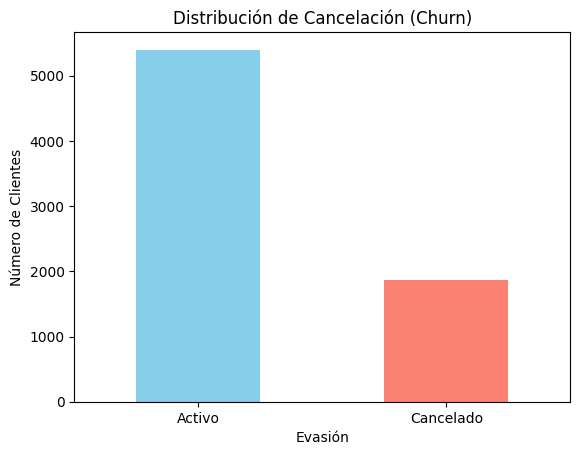

In [13]:
# Visualización
import matplotlib.pyplot as plt

conteo_churn.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Cancelación (Churn)')
plt.xlabel('Evasión')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Activo', 'Cancelado'], rotation=0)
plt.show()

## **Balanceo de Clases (opcional)**

In [14]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE()
x_balanceada, y_balanceada = oversampling.fit_resample(X, y)

y_balanceada.value_counts()

Evasión
False    5398
True     5398
Name: count, dtype: int64

# **🎯 Correlación y Selección de Variables**

## **Análisis de Correlación**

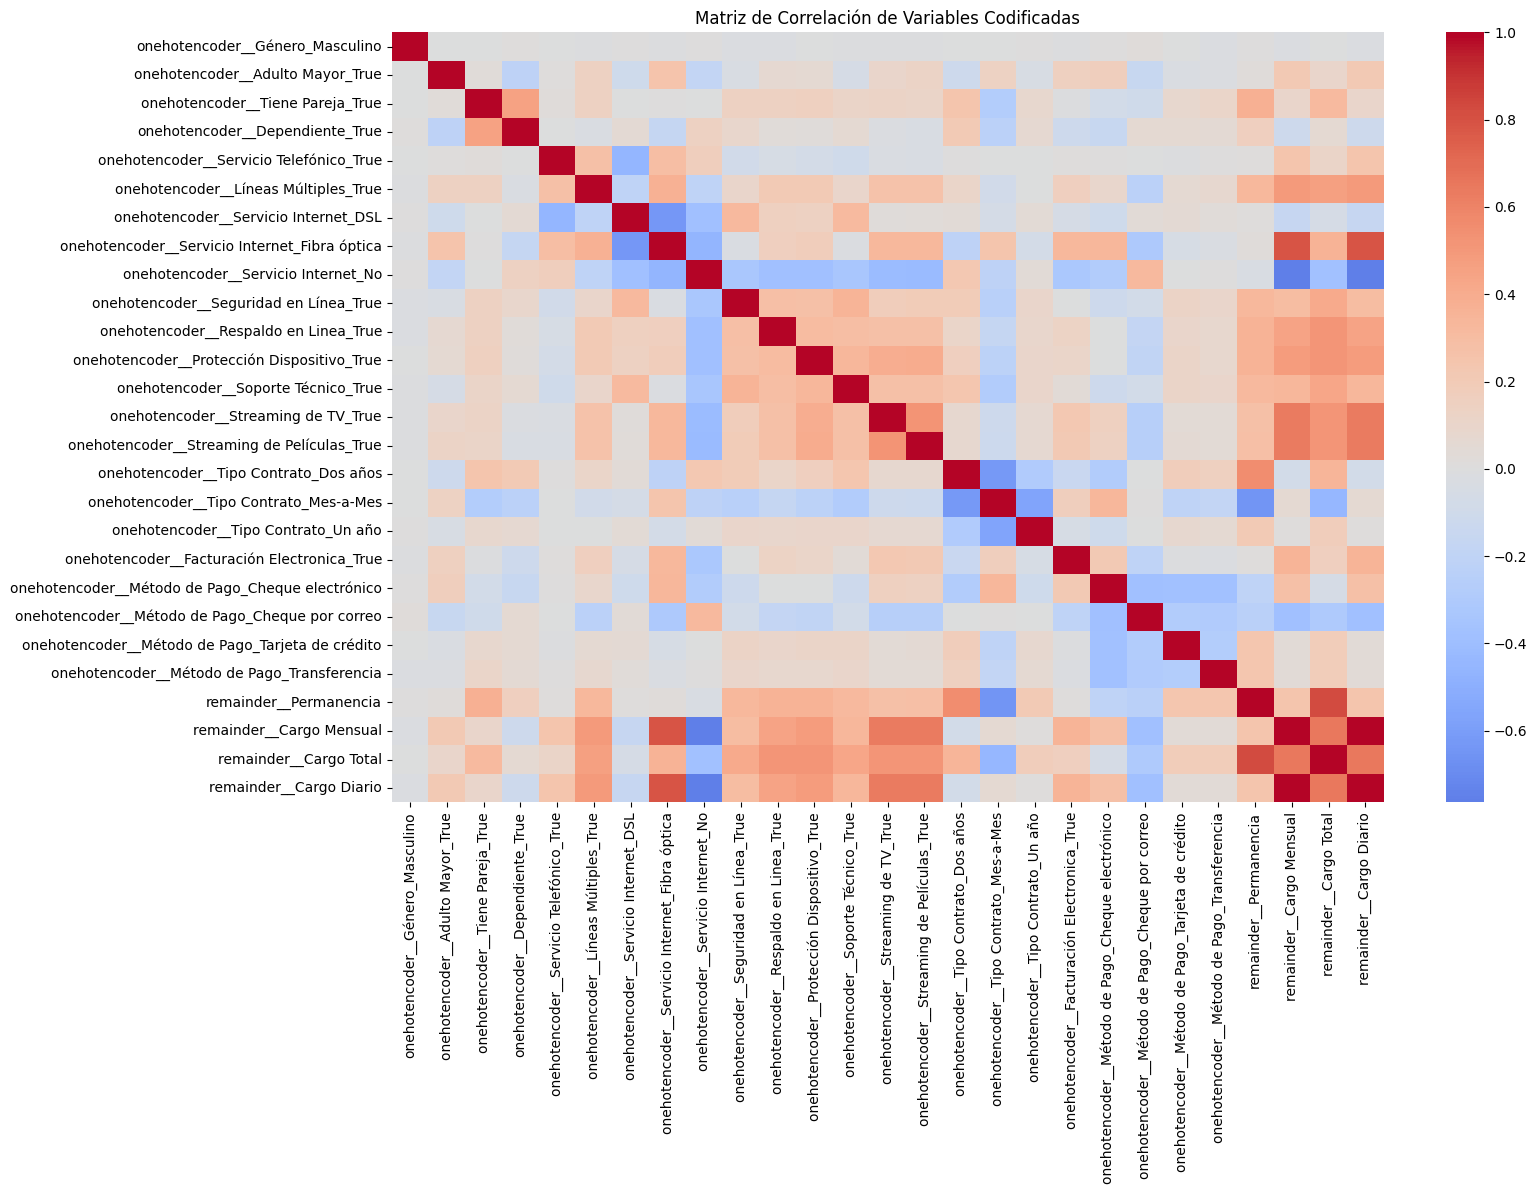

In [25]:
import seaborn as sns

# Calcula la matriz de correlación usando los datos codificados
corr_matrix = datos_codificados.corr()

# Visualiza la matriz de correlación
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f")
plt.title('Matriz de Correlación de Variables Codificadas')
plt.show()

## **Análisis Dirigido**

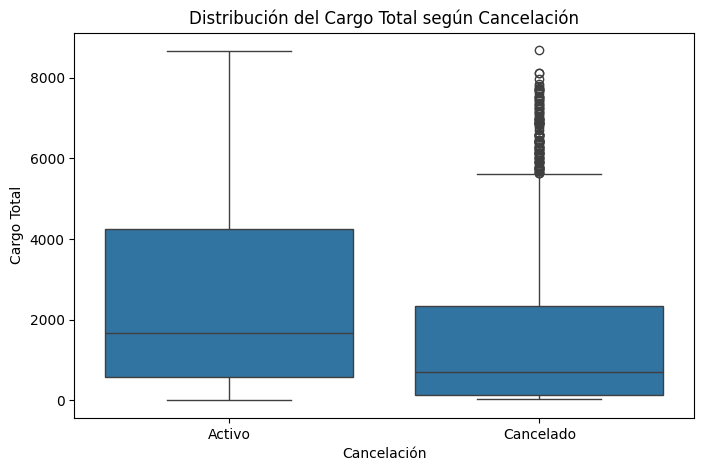

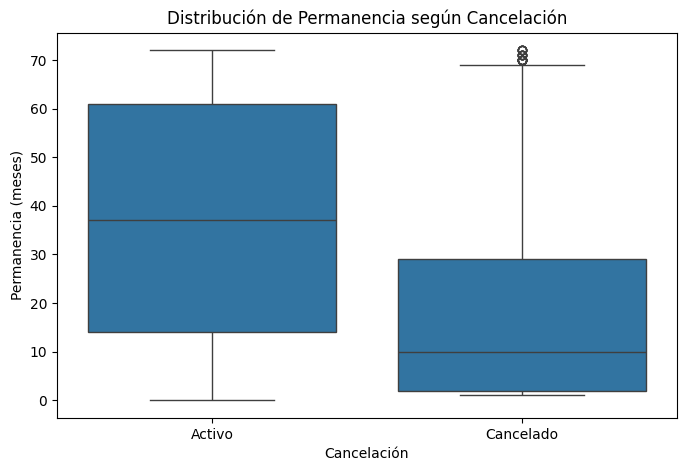

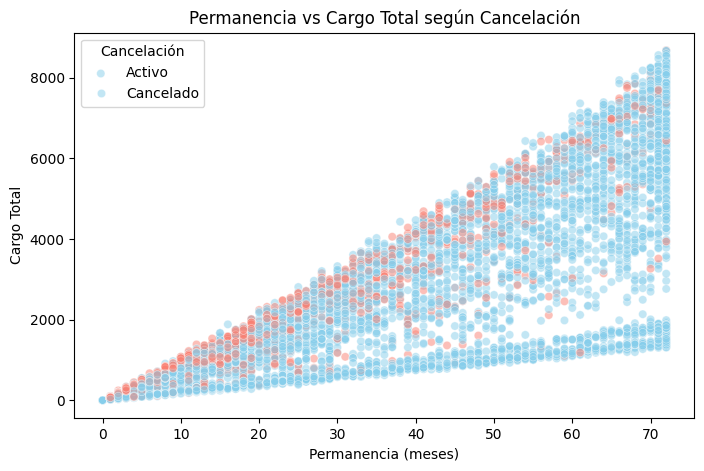

In [16]:
# Boxplot: Cargo Total vs Cancelación
plt.figure(figsize=(8, 5))
sns.boxplot(x='Evasión', y='Cargo Total', data=datos)
plt.xticks([0, 1], ['Activo', 'Cancelado'])
plt.title('Distribución del Cargo Total según Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Cargo Total')
plt.show()

# Boxplot: Permanencia vs Cancelación
plt.figure(figsize=(8, 5))
sns.boxplot(x='Evasión', y='Permanencia', data=datos)
plt.xticks([0, 1], ['Activo', 'Cancelado'])
plt.title('Distribución de Permanencia según Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Permanencia (meses)')
plt.show()

# Scatter plot: Permanencia vs Cargo Total, coloreado por Cancelación
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Permanencia',
    y='Cargo Total',
    hue='Evasión',
    data=datos,
    palette={0.0: 'skyblue', 1.0: 'salmon'},
    alpha=0.5
)
plt.title('Permanencia vs Cargo Total según Cancelación')
plt.xlabel('Permanencia (meses)')
plt.ylabel('Cargo Total')
plt.legend(title='Cancelación', labels=['Activo', 'Cancelado'])
plt.show()

# **🤖 Modelado Predictivo**

## **Separación de Datos**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [17]:
from sklearn.model_selection import train_test_split

# División 70% entrenamiento, 30% prueba usando el conjunto balanceado por undersampling
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")

Entrenamiento: 5086 muestras
Prueba: 2181 muestras


## **Evaluación de los Modelos**

Evalúa cada modelo utilizando las siguientes métricas:

- Exactitud (Acurácia)
- Precisión
- Recall
- F1-score
- Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

- ¿Cuál modelo tuvo el mejor desempeño?
- ¿Algún modelo presentó overfitting o underfitting? 

Si es así, considera las posibles causas y ajustes:

**Overfitting:** Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

**Underfitting:** Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate

In [19]:
def intervalo_confianza(resultados):
    promedio = resultados['test_score'].mean()
    desvio_std = resultados['test_score'].std()
    return f'El intervalo de confianza es: [{promedio - 2 * desvio_std}, {min(promedio + 2 * desvio_std, 1)}]'

In [20]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

In [21]:
# Definir el modelo
modelo_dt = DecisionTreeClassifier(max_depth=10)
# Definir la validación cruzada
kf = KFold(n_splits=5, shuffle = True, random_state=5)
# Realizar la validación cruzada
cv_resultados = cross_validate(modelo_dt, X, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.01544905, 0.01497602, 0.01518273, 0.01481581, 0.01605296]),
 'score_time': array([0.00321698, 0.00291085, 0.00284314, 0.00274873, 0.00281549]),
 'test_accuracy': array([0.78610729, 0.78817056, 0.76531315, 0.77013076, 0.75911906]),
 'test_recall': array([0.49253731, 0.50837989, 0.54285714, 0.51002865, 0.512     ]),
 'test_precision': array([0.64918033, 0.57961783, 0.55882353, 0.52199413, 0.53481894]),
 'test_f1': array([0.56011315, 0.54166667, 0.55072464, 0.51594203, 0.52316076])}

In [22]:
informe_metricas(cv_resultados)

Intervalo de confianza(test_accuracy): [0.7508073760530928, 0.796728954888629]
Intervalo de confianza(test_recall): [0.4804043373457574, 0.5459168617955481]
Intervalo de confianza(test_precision): [0.47934136230218444, 0.6584325449286397]
Intervalo de confianza(test_f1): [0.5052083973529506, 0.5714345028265184]
